In [43]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)), theme = 'white')

%matplotlib inline


from option_param import Parameters # type: ignore
from bsm import BSM # type: ignore



In [44]:
a = Parameters(100,90,0,1,0.05,0.0,0.2) # 
aa = BSM(a)
aa.set_results()
aa.set_barrier(120)
aa.get_results()

Options                          |  Call          |  Put          
______________________________________________________________________________
vanilla                          |  16.6994484    |  2.3100966   
binary_cash_or_nothing           |  0.7141206     |  0.2371088   
binary_asset_or_nothing          |  80.9703061    |  19.0296939  
up_and_in                        |  13.0295079    |  0.0425505   
up_and_out                       |  3.6699405     |  2.2675461   
down_and_in                      |  16.6994484    |  2.3100966   
down_and_out                     |  0.0000000     |  0.0000000   
vanilla_delta                    |  0.8097031     |  -0.1902969  
binary_cash_or_nothing_delta     |  0.0150903     |  -0.0150903  
binary_asset_or_nothing_delta    |  2.1678320     |  -1.1678320  
vanilla_gamma                    |  0.0135813     |  0.0135813   
binary_cash_or_nothing_gamma     |  -0.0006616    |  0.0006616   
binary_asset_or_nothing_gamma    |  -0.0459593    |  0.0459593

In [45]:
b = Parameters(100,110,0,1,0.05,0.0,0.2)
bb = BSM(b)
bb.set_results()
bb.set_barrier(120)
bb.get_results()

Options                          |  Call          |  Put          
______________________________________________________________________________
vanilla                          |  6.0400881     |  10.6753248  
binary_cash_or_nothing           |  0.3538610     |  0.5973685   
binary_asset_or_nothing          |  44.9647931    |  55.0352069  
up_and_in                        |  5.8884788     |  0.7531962   
up_and_out                       |  0.1516093     |  9.9221286   
down_and_in                      |  6.0400881     |  10.6753248  
down_and_out                     |  0.0000000     |  0.0000000   
vanilla_delta                    |  0.4496479     |  -0.5503521  
binary_cash_or_nothing_delta     |  0.0179891     |  -0.0179891  
binary_asset_or_nothing_delta    |  2.4284503     |  -1.4284503  
vanilla_gamma                    |  0.0197880     |  0.0197880   
binary_cash_or_nothing_gamma     |  0.0001138     |  -0.0001138  
binary_asset_or_nothing_gamma    |  0.0323090     |  -0.032309

# Plot Visualisation

## Process: 
1. Set all param

    e.g. np.linspace(a,b,c)
2. Define bespoke function where we fixe all param except 2

    e.g. def stock_strike(a,b): where a and b
    are the two variable (i.e how much Option price change
    as we are changing these param)
3. Vectorise the function with np.vectorize

    This numpy function is simply a loop accross multiple value.
4. plot 3d surface

In [27]:
# Set all param
s = np.linspace(1,300,21)
k = np.linspace(1,300,21)
t = np.linspace(0,30,21)
T = np.linspace(1,30,21)
r= np.linspace(0,1.0,21)
q = np.linspace(0,1.0,21)
vol = np.linspace(0.01,1.0,21)



### STOCK / STRIKE
Check how the price of a vanilla call change with respect to it's stock and strike

In [28]:
def stock_strike(a,b):
    
    temp = Parameters(a,b, 0,1,0.05,0,0.2)
    temp2 = BSM(temp)
    temp2.set_results()
    return temp2.r_eu_binary_asset_or_nothing_c
    
    

In [29]:
X, Y = np.meshgrid(s,k)
Z = np.vectorize(stock_strike)(X,Y)

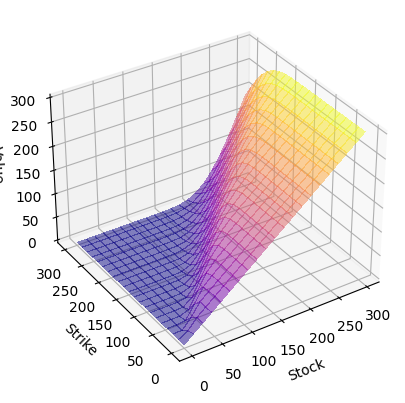

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)  # type: ignore
ax.set_xlabel('Stock')
ax.set_ylabel('Strike')
ax.set_zlabel('Value');  # type: ignore

# rotation
ax.view_init(33, -123)
plt.savefig('Image/stock_strike.png',dpi=600)
plt.show()

### Stock / t

In [31]:
def stock_time(a,b):
    temp = Parameters(a,100, 0, b, 0,0,0.2)
    temp2 = BSM(temp)
    temp2.set_results()
    return temp2.r_eu_binary_asset_or_nothing_c

In [32]:
X, Y = np.meshgrid(s,T)
Z = np.vectorize(stock_time)(X,Y)

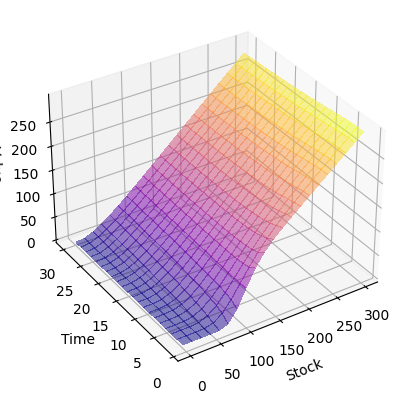

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('Stock')
ax.set_ylabel('Time')
ax.set_zlabel('Value');

# rotation
ax.view_init(33, -123)
plt.savefig('Image/stock_time.png',dpi=600)
plt.show()

### Stock /  Rate

In [34]:
def stock_rate(a,b):
    temp = Parameters(a,100, 0,1,b,0,0.2)
    temp2 = BSM(temp)
    temp2.set_results()
    return temp2.r_eu_binary_asset_or_nothing_c

In [35]:
X, Y = np.meshgrid(s,r)
Z = np.vectorize(stock_rate)(X,Y)

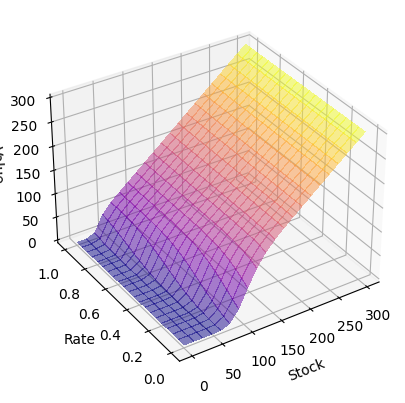

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('Stock')
ax.set_ylabel('Rate')
ax.set_zlabel('Value');

# rotation
ax.view_init(33, -123)
plt.savefig('Image/stock_rate.png',dpi=600)
plt.show()

### Stock Dividend

In [37]:
def stock_dividend(a,b):
    temp = Parameters(a,100, 0,1,0.05,b,0.2)
    temp2 = BSM(temp)
    temp2.set_results()
    return temp2.r_eu_binary_asset_or_nothing_c

In [38]:
X, Y = np.meshgrid(s,q)
Z = np.vectorize(stock_dividend)(X,Y)

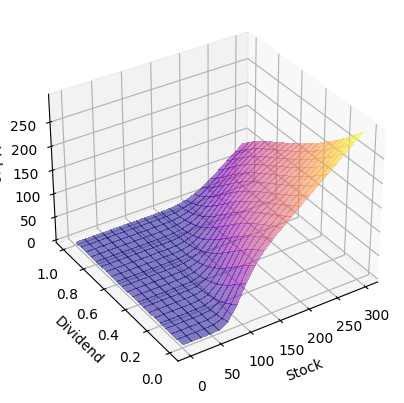

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('Stock')
ax.set_ylabel('Dividend')
ax.set_zlabel('Value');

# rotation
ax.view_init(33, -123)
plt.savefig('Image/stock_dividend.png',dpi=600)
plt.show()

### Stock / Vol

In [40]:
def stock_vol(a,b):
    temp = Parameters(a,100, 0,1,0.05,0,b)
    temp2 = BSM(temp)
    temp2.set_results()
    return temp2.r_eu_binary_asset_or_nothing_c

In [41]:
X, Y = np.meshgrid(s,vol)
Z = np.vectorize(stock_vol)(X,Y)

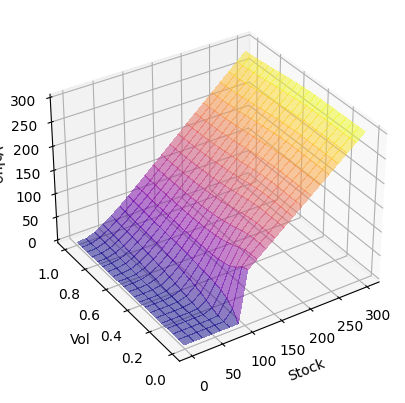

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('Stock')
ax.set_ylabel('Vol')
ax.set_zlabel('Value');

# rotation
ax.view_init(33, -123)
plt.savefig('Image/stock_vol.png',dpi=600)
plt.show()